# Distribuciones muestrales y técnicas de evaluación de modelos

### OBJETIVO

- Explorar las `distribuciones muestrales` de estadísticas de las variables numéricas en nuestro dataset
- Practicar el entrenamiento de modelos de `Regresión Lineal Múltiple`

En este notebook se presenta el análisis de la incertidumbre y los sesgos que existen en las medidas de locación y dispersión de nuestras variables numéricas. Nos centraremos en la evaluación de las concentraciones promedio diaria de los contaminantes $PM_{10}$ y $PM_{2.5}$ para los distintos años.

Utilizaremos  
1. La técnica de `bootstrap`, evaluando las medidas de distribución, asimetría, curtosis y error estándar.  
2. `Intervalos de confianza` para la media de estas concentraciones para cada año.  

Además, a manera de práctica, realizaremos un `modelo de regresión lineal múltiple`, utilizando primero la técnica de división de un data set y la validación cruzada.

In [1]:
#Primero cargar las librerias que vamos a utilizar
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from scipy.stats import skew, kurtosis


In [2]:
#Cargamos nuestro dataset
df= pd.read_csv('../Datasets/DatosPM_Zona.csv', index_col=0)

## Exploración inicial

Primeramente vemos las características de nuestras medidas de locación para los promedios diarios de $PM_{10}$ y $PM_{2.5}$ de labase de datos original.

In [3]:
df.groupby('Year')[['PD_PM10','PD_PM25']].describe()

PD_PM10                                    ... PD_PM25                        
       count       mean        std   min   25%  ...     min   25%   50%   75%   max
Year                                            ...                                
2019   433.0  49.914550  15.674336  14.0  39.0  ...     7.8  19.5  25.5  32.2  54.1
2020   437.0  40.805492  13.370211  11.0  30.0  ...     5.2  15.9  20.9  26.8  51.7

[2 rows x 16 columns]

In [4]:
df[df['Year']==2019].PD_PM10

0      56.0
1      81.0
2      63.0
3      56.0
4      38.0
       ... 
428    39.0
429    40.0
430    39.0
431    43.0
432    36.0
Name: PD_PM10, Length: 433, dtype: float64

Luego, exploramos la distribución actual de nuestros datos para ver si tenemos algún sesgo.

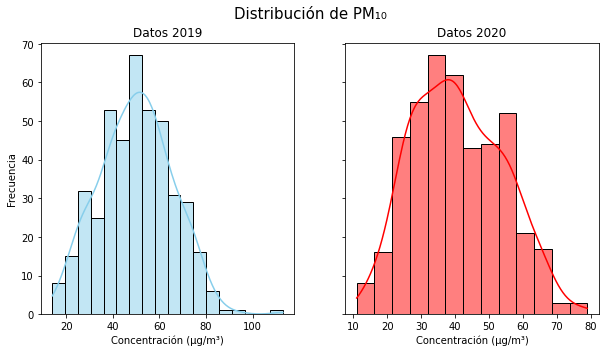

In [5]:
fig, axes= plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(x=df[df['Year']==2019].PD_PM10, ax=axes[0], color="skyblue", label="2019", kde=True);
sns.histplot(x=df[df['Year']==2020].PD_PM10, ax=axes[1], color="red", label="2020", kde=True);

axes[0].set(xlabel='Concentración (µg/m³)', ylabel='Frecuencia', title='Datos 2019');
axes[1].set(xlabel='Concentración (µg/m³)', ylabel='', title='Datos 2020');

fig.suptitle('Distribución de PM₁₀', fontsize=15);

A simple vista, ambos conjuntos de datos parecen aproximarse a una normal. Ahora observaremos los datos de $PM_{2.5}$

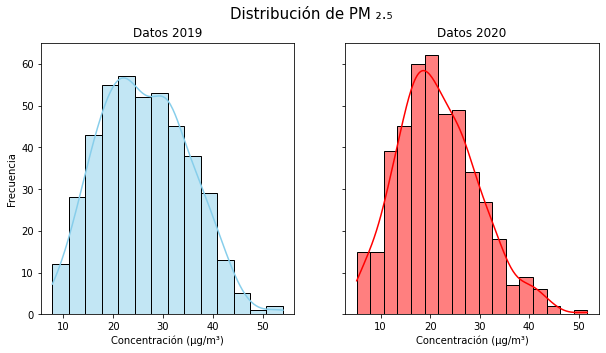

In [6]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(x=df[df['Year']==2019].PD_PM25, ax=axes[0], color="skyblue", label="2019", kde=True);
sns.histplot(x=df[df['Year']==2020].PD_PM25, ax=axes[1], color="red", label="2020", kde=True);

axes[0].set(xlabel='Concentración (µg/m³)', ylabel='Frecuencia', title='Datos 2019');
axes[1].set(xlabel='Concentración (µg/m³)', ylabel='', title='Datos 2020');


fig.suptitle('Distribución de PM ₂․₅', fontsize=15);

En este caso, la distribución de $PM_{2.5}$ en el año 2020 parece estar ligeramente sesgada a la izquieda.

## Bootstrap
Ahora, procederemos a realizar la técnica de bootstrap para remuestrear nuestros datos. De la misma manera en la que lo hemos hecho antes, muestrearemos dividiendo el año y el contaminante. Como vimos en el notebook anterior, los valores atípicos parecen ser mínimos para este dataset, por lo que omitiremos ese paso y directamente realizaremos la evaluación 


Primeramente realizaremos el bootstrap para el $PM_{10}$ y posteriormente para el $PM_{2.5}$. Exploraremos tanto la media como la mediana de estos conjuntos de datos.

In [7]:
#Para el PM10
#dividimos los datos en el dataset de PM10 para cada año
PM10_19 = df[df['Year']==2019]['PD_PM10']
PM10_20 = df[df['Year']==2020]['PD_PM10']
means_PM1019= []
means_PM1020=[]
median_PM1019=[]
median_PM1020=[]
#Calculamos los valores de las medias utilizando una muestra de 10,000 elementos
for i in range(10_000):
   sample_19 = PM10_19.sample(frac= 0.30, replace=True)
   sample_20 = PM10_20.sample(frac= 0.30, replace=True)
   means_PM1019.append(sample_19.mean())
   means_PM1020.append(sample_20.mean())
   median_PM1019.append(sample_19.median())
   median_PM1020.append(sample_20.median())

#series_means = pd.Series(means)

In [8]:
#Para el PM25
PM25_19 = df[df['Year']==2019]['PD_PM25']
PM25_20 = df[df['Year']==2020]['PD_PM25']
means_PM2519= []
means_PM2520=[]
median_PM2519=[]
median_PM2520=[]
#El guión bajo es como una coma
for i in range(10_000):
   sample_19 = PM25_19.sample(frac= 0.30, replace=True)
   sample_20 = PM25_20.sample(frac= 0.30, replace=True)
   means_PM2519.append(sample_19.mean())
   means_PM2520.append(sample_20.mean())
   median_PM2519.append(sample_19.median())
   median_PM2520.append(sample_20.median())


#series_means = pd.Series(means)

In [9]:
#Conversión a series
series_meansPM1019 = pd.Series(means_PM1019)
series_meansPM1020 = pd.Series(means_PM1020)
series_medianPM1019 = pd.Series(median_PM1019)
series_medianPM1020 = pd.Series(median_PM1020)
series_meansPM2519 = pd.Series(means_PM2519)
series_meansPM2520 = pd.Series(means_PM2520)
series_medianPM2519 = pd.Series(median_PM2519)
series_medianPM2520 = pd.Series(median_PM2520)

## Análisis de muestras bootstrap
Como siguiente paso, exploraremos algunas variables estadísticas de interés para nuestras nuevas series de datos. La información que se presentará será:


1. Gráfico de dispersión
2. Asimetría
3. Curtosis
4. Error estándar
5. Intervalo de confianza



### Para la media de las nuevas series
#### Media de $PM_{10}$

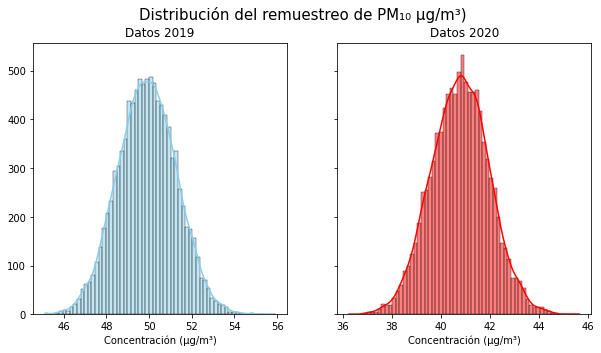

In [10]:
#Para las medias del PM10
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(x=series_meansPM1019, ax=axes[0], color="skyblue", label="2019", kde=True)
sns.histplot(x=series_meansPM1020, ax=axes[1], color="red", label="2020", kde=True)

axes[0].set(xlabel='Concentración (µg/m³)', ylabel='', title='Datos 2019')
axes[1].set(xlabel='Concentración (µg/m³)', ylabel='', title='Datos 2020')


fig.suptitle('Distribución del remuestreo de PM₁₀ µg/m³)', fontsize=15);


In [11]:
print(f'La curtosis para los datos de PM₁₀ de 2019 es de {round(kurtosis(series_meansPM1019),4)}, mientras que para los datos de 2020 es {round(kurtosis(series_meansPM1020),4)}')
print(f'La asimetría para los datos de PM₁₀ 2019 es de {round(skew(series_meansPM1019),4)}, mientras que para los datos de 2020 es {round(skew(series_meansPM1020),4)}')


La curtosis para los datos de PM₁₀ de 2019 es de -0.0399, mientras que para los datos de 2020 es -0.0069
La asimetría para los datos de PM₁₀ 2019 es de 0.0313, mientras que para los datos de 2020 es 0.0073


En ambos casos, tanto la curtosis y la asimetría son cercanos a 0, lo que nos confirma lo que observamos en las gráficas: que ambas muestras se distribuyen normalmente, aunque cabe señalar que cuentan con medias y desviaciones estándar distintas.

In [12]:
#Función para realizar los intervalos de confianza
def means_interval(serie,variable,intervalo):
  cuantil_inf=((100-intervalo)/2)/100
  cuantil_sup=((100+intervalo)/2)/100
  limite_inferior = serie.quantile(cuantil_inf)
  limite_superior = serie.quantile(cuantil_sup)
  mean_of_intervals = ((variable.mean() - limite_inferior) + (limite_superior - variable.mean())) / 2
  return round(mean_of_intervals,3)


In [13]:
print(f'Error Estándar de PM10 para 2019 es: {round(series_meansPM1019.std(),4)}')
print(f'Intervalo 95% de la media media: {round(PM10_19.mean(),4)} +/- {means_interval(series_meansPM1019,PM10_19,95)}')

Error Estándar de PM10 para 2019 es: 1.363
Intervalo 95% de la media media: 49.9145 +/- 2.665


In [14]:
print(f'Error Estándar de PM10 para 2020 es: {round(series_meansPM1020.std(),4)}')
print(f'Intervalo 95% de la media media: {round(PM10_20.mean(),4)} +/- {means_interval(series_meansPM1020,PM10_20,95)}')

Error Estándar de PM10 para 2020 es: 1.1779
Intervalo 95% de la media media: 40.8055 +/- 2.313


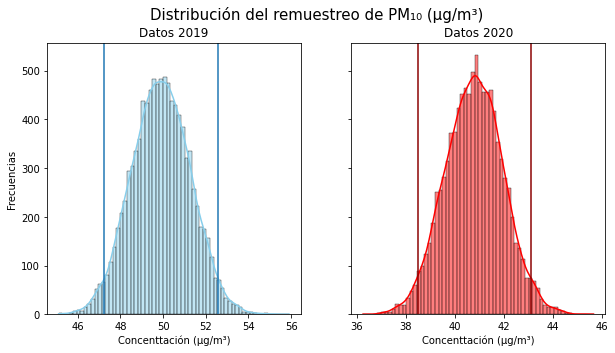

In [15]:
#Para las medias del PM10
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(series_meansPM1019, ax=axes[0], color="skyblue", label="2019", kde=True)
sns.histplot(series_meansPM1020, ax=axes[1], color="red", label="2020", kde=True)
#Los límites para 2019
axes[0].axvline(series_meansPM1019.quantile(0.025))
axes[0].axvline(series_meansPM1019.quantile(0.975))
#Los límites para 2020
axes[1].axvline(series_meansPM1020.quantile(0.025), color= '#8B0000')
axes[1].axvline(series_meansPM1020.quantile(0.975), color= '#8B0000')

axes[0].set(xlabel='Concenttación (µg/m³)', ylabel='Frecuencias', title='Datos 2019')
axes[1].set(xlabel='Concenttación (µg/m³)', ylabel='', title='Datos 2020')

fig.suptitle('Distribución del remuestreo de PM₁₀ (µg/m³)', fontsize=15);

#### Media de $PM_{2.5}$

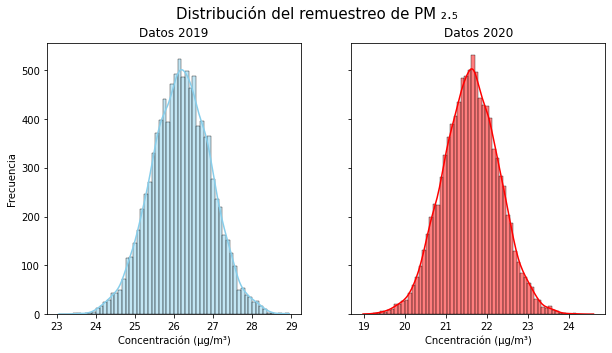

In [16]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(x=series_meansPM2519, ax=axes[0], color="skyblue", label="2019", kde=True)
sns.histplot(x=series_meansPM2520, ax=axes[1], color="red", label="2020", kde=True)

axes[0].set(xlabel='Concentración (µg/m³)', ylabel='Frecuencia', title='Datos 2019')
axes[1].set(xlabel='Cncentración (µg/m³)', ylabel='', title='Datos 2020')

fig.suptitle('Distribución del remuestreo de PM ₂․₅', fontsize=15);


In [17]:
print(f'La curtosis para los datos de 2019 es de {round(kurtosis(series_meansPM2519),4)}, mientras que para los datos de 2020 es {round(kurtosis(series_meansPM2520),4)}')
print(f'La asimetría para los datos de 2019 es de {round(skew(series_meansPM2519),4)}, mientras que para los datos de 2020 es {round(skew(series_meansPM2520),4)}')


La curtosis para los datos de 2019 es de 0.0116, mientras que para los datos de 2020 es 0.0921
La asimetría para los datos de 2019 es de -0.0319, mientras que para los datos de 2020 es 0.0084


Al igual que con el $PM_{10}$, en ambos casos, tanto la curtosis y la asimetría son cercanos a 0, lo que nos confirma lo que observamos en las gráficas: que ambas muestras se distribuyen normalmente, aunque cabe señalar que también las medias de cada año cuentan con medias y desviaciones estándar distintas.

In [18]:
print(f'Error Estándar de PM2.5 para 2019 es: {round(series_meansPM2519.std(),4)}')
print(f'Intervalo 95% de la media de PM 2.5 en 2019 es: {round(PM25_19.mean(),4)} +/- {means_interval(series_meansPM2519,PM25_19,95)}')

Error Estándar de PM2.5 para 2019 es: 0.7613
Intervalo 95% de la media de PM 2.5 en 2019 es: 26.1866 +/- 1.487


In [19]:
print(f'Error Estándar de PM2.5 para 2020 es: {round(series_meansPM2520.std(),4)}')
print(f'Intervalo 95% de la media de PM2.5 en 2020 es: {round(PM25_20.mean(),4)} +/- {means_interval(series_meansPM2520,PM25_20,95)}')

Error Estándar de PM2.5 para 2020 es: 0.6929
Intervalo 95% de la media de PM2.5 en 2020 es: 21.6043 +/- 1.359


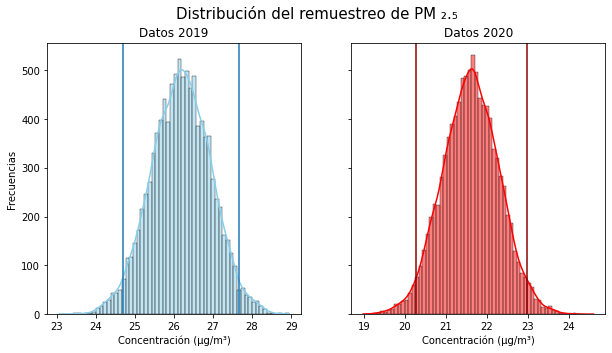

In [20]:
fig, axes = plt.subplots(1, 2, figsize=(10, 5), sharex=False, sharey=True)

sns.histplot(x=series_meansPM2519, ax=axes[0], color="skyblue", label="2019", kde=True)
sns.histplot(x=series_meansPM2520, ax=axes[1], color="red", label="2020", kde=True)

axes[0].set(xlabel='Concentración (µg/m³)', ylabel='Frecuencias', title='Datos 2019')
axes[1].set(xlabel='Concentración (µg/m³)', ylabel='', title='Datos 2020')

#Limites de los intervalos de confianza
axes[0].axvline(series_meansPM2519.quantile(0.025))
axes[0].axvline(series_meansPM2519.quantile(0.975))
axes[1].axvline(series_meansPM2520.quantile(0.025), color= '#8B0000')
axes[1].axvline(series_meansPM2520.quantile(0.975), color= '#8B0000')

fig.suptitle('Distribución del remuestreo de PM ₂․₅', fontsize=15);

## Regresión Lineal con conjunto de prueba y conjunto de validación
Aunque el objetivo de nuestro proyecto no es predecir la concentración de contaminantes con respecto a ciertos parámetros, se realizará el ejercicion de la regresión lineal múltiple con dos métodos:

1.   Utilizando el conjunto de prueba y de validación.
2.   Utilizando la validación cruzada.

Al carecer de variables numéricas que tenga sentido comparar, utilizaremos la variable categórica de la zona y el año para entrenar el modelo.


In [21]:
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_validate
from sklearn.linear_model import LinearRegression


In [22]:
#cambiamos el tipo de dato del año
df['Year']=df['Year'].astype(str)
#confirmamos el cambio
df.dtypes

Date            object
Year            object
Month            int64
Zone            object
PD_PM10        float64
Max_PM10       float64
Min_PM10       float64
Indice_PM10    float64
Clase_PM10      object
PD_PM25        float64
Max_PM25       float64
Min_PM25       float64
Indice_PM25    float64
Clase_PM25      object
dtype: object

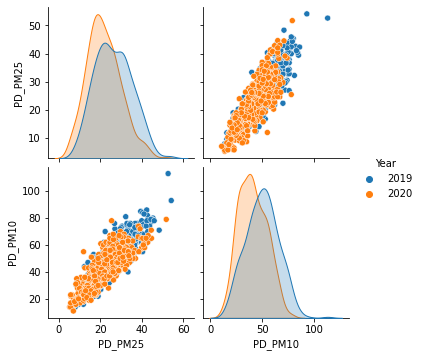

In [23]:
sns.pairplot(df[['PD_PM25','PD_PM10','Zone','Year']], hue='Year');

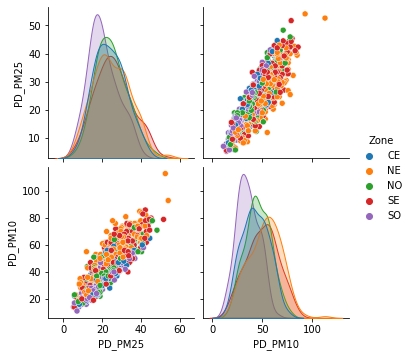

In [24]:
sns.pairplot(df[['PD_PM25','PD_PM10','Zone','Year']], hue='Zone');

In [25]:
#Separamos el dataset
X= df[['PD_PM10','Zone','Year']]
y = df['PD_PM25']

Establecemos las variables categóricas del año como variables indicativas y dividimos el dataset en el conjunto de validación y el conjunto de prueba. 

In [26]:
X = pd.get_dummies(data=X, drop_first=True)
X.head()

,PD_PM10,Zone_NE,Zone_NO,Zone_SE,Zone_SO,Year_2020
0,56.0,0,0,0,0,0
1,81.0,1,0,0,0,0
2,63.0,0,1,0,0,0
3,56.0,0,0,1,0,0
4,38.0,0,0,0,1,0


In [27]:
#Lo dividimos en conjunto de prueba y conjunto de validación utilizando el 30% de los datos
X_training, X_test, y_training, y_test = train_test_split(X, y, test_size=0.3, shuffle=True)

Observamos que la variable del año asigno `Verdadero` si la medición corresponde al año 2020, mientras que la variable de la zona se dividió en 5 columnas, uno por cada zona.

Ahora, ajustamos el modelo de regresión lineal múltiple.

In [28]:
lr = LinearRegression()
lr.fit(X_training, y_training)

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [29]:
lr.score(X_test, y_test)

0.7493683064605201

Con esto observamos que el modelo de regresión lineal múltiple ajustado con los datos de prueba obtuvo una $R^2$ de casi el 76% para el conjunto de validación. Exploramos otras métricas que pueden ser de interés.

In [30]:
import sklearn.metrics as metrics
lr.fit(X_training, y_training)
y_predict = lr.predict(X_test)
metrics.mean_absolute_error(y_test, y_predict)

3.480821127131753

## Regresión correlación cruzada
Como último paso de este notebook, utilizamos el dataset de las variables independientes (dataset X) y el dataset de las variables categóricas (dataset Y) para realizar una validación cruzada del mismo modelo. 

In [31]:
scores = cross_validate(lr, X, y, scoring='r2')

In [32]:
print(f'Score del modelo: {scores["test_score"].mean():.3f} +/- {scores["test_score"].std():.3f}')

Score del modelo: 0.702 +/- 0.061


In [33]:
scores_2 = cross_validate(lr, X, y, scoring='neg_mean_absolute_error')

In [34]:
print(f'MAE del modelo: {abs(scores_2["test_score"].mean()):.3f} +/- {abs(scores_2["test_score"].std()):.3f}')

MAE del modelo: 3.598 +/- 0.231


Después de realizar la prueba k veces, obtenemos que la R2 del modelo está del intervalo de [0.641, 0.763], mientras que el promedio del valor absoluto del error está entre [3.367,3.829]

##### Como exploración utilizando el modelo de regresión lineal múltiple utilizando todos los datos

In [35]:
lr = LinearRegression()
lr.fit(X, y)
print(f'El R2 para del modelo de regresión lineal múltiple para todos los datos es de {round(lr.score(X, y),4)}')
y_predict = lr.predict(X)
print(f'El MAE para del modelo de regresión lineal múltiple para todos los datos es de {round(metrics.mean_absolute_error(y, y_predict),4)}')

El R2 para del modelo de regresión lineal múltiple para todos los datos es de 0.7782
El MAE para del modelo de regresión lineal múltiple para todos los datos es de 3.2249
